In [65]:
# import all necessary package
import pandas as pd
from pathlib import Path
import glob
import sys
import numpy as np
import os

In [66]:
AAA_dataset_path = r'D:\Users\anyamanee\Anyamanee_Work\01_AppleAutoAuction\00_Doc_Ref\AAB 01 Jun 2023 01-42-29.xlsx'
AAA_dataset_path = os.path.join(AAA_dataset_path)
AAA_dataset_path

'D:\\Users\\anyamanee\\Anyamanee_Work\\01_AppleAutoAuction\\00_Doc_Ref\\AAB 01 Jun 2023 01-42-29.xlsx'

In [67]:
AAA_df = list(pd.read_excel(AAA_dataset_path, sheet_name=None).values())
out_df = pd.concat(AAA_df)

#Create an index column for cumulative count within each group
out_df['Index_byBrand'] = out_df.groupby('Brand').cumcount() + 1
out_df.head(10)

,Brand,Model,Year,Vehicle,RB Code,Average Wholesale,Average Retail,Good Wholesale,Good Retail,New Price (RRP),Index_byBrand
0,Honda,Accord,2022,MY21 Sedan 4dr EL CVT FWD 1.5iTC,HOND22BB,990500,1059000,1080500,1154500,1499000,1
1,Honda,Accord,2022,MY21 Sedan 4dr e:HEV EL+ E-CVT FWD 2.0i,HOND22BC,1085000,1159500,1181500,1262000,1639000,2
2,Honda,Accord,2022,MY21 Sedan 4dr e:HEV TECH E-CVT FWD 2.0i,HOND22BD,1194000,1275000,1297500,1385000,1799000,3
3,Honda,Accord,2021 MNC,MY21 Sedan 4dr EL CVT FWD 1.5iTC,HOND21BQ,985000,1053000,1075500,1149500,1499000,4
4,Honda,Accord,2021 MNC,MY21 Sedan 4dr e:HEV TECH E-CVT FWD 2.0i,HOND21BS,1135500,1213000,1237000,1320500,1799000,5
5,Honda,Accord,2021,MY19 Sedan 4dr TURBO EL CVT FWD 1.5iTC,HOND21AA,950500,1016500,1039000,1110500,1475000,6
6,Honda,Accord,2021,MY19 Sedan 4dr Hybrid E-CVT FWD 2.0i,HOND21AB,1047000,1119000,1142000,1220000,1639000,7
7,Honda,Accord,2021,MY19 Sedan 4dr Hybrid TECH E-CVT FWD 2.0i,HOND21AC,1114000,1190000,1213500,1296000,1799000,8
8,Honda,Accord,2020,MY19 Sedan 4dr TURBO EL CVT FWD 1.5iTC,HOND20BC,902000,965500,989500,1058000,1475000,9
9,Honda,Accord,2020,MY19 Sedan 4dr Hybrid E-CVT FWD 2.0i,HOND20BD,1007500,1077000,1102000,1177500,1639000,10


In [68]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1742 entries, 0 to 208
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              1742 non-null   object
 1   Model              1742 non-null   object
 2   Year               1742 non-null   object
 3   Vehicle            1742 non-null   object
 4   RB Code            1742 non-null   object
 5   Average Wholesale  1742 non-null   int64 
 6   Average Retail     1742 non-null   int64 
 7   Good Wholesale     1742 non-null   int64 
 8   Good Retail        1742 non-null   int64 
 9   New Price (RRP)    1742 non-null   int64 
 10  Index_byBrand      1742 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 163.3+ KB


In [69]:
df_brand = out_df['Brand'].value_counts()
print("# of AAA's DATA: ",df_brand.sum())
df_brand

# of AAA's DATA:  1742


Honda         551
Mazda         409
Mitsubishi    382
Subaru        209
Hyundai       191
Name: Brand, dtype: int64

##### EDA

In [70]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = out_df
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1742 entries, 0 to 208
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              1742 non-null   object
 1   Model              1742 non-null   object
 2   Year               1742 non-null   object
 3   Vehicle            1742 non-null   object
 4   RB Code            1742 non-null   object
 5   Average Wholesale  1742 non-null   int64 
 6   Average Retail     1742 non-null   int64 
 7   Good Wholesale     1742 non-null   int64 
 8   Good Retail        1742 non-null   int64 
 9   New Price (RRP)    1742 non-null   int64 
 10  Index_byBrand      1742 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 163.3+ KB


In [74]:
# Calculate percentage difference
data['%Diff(NP-GWP)'] = (data['New Price (RRP)']- data['Good Wholesale']) / data['Good Wholesale'] * 100
data['%Diff(NP-AWP)'] = (data['New Price (RRP)']- data['Average Wholesale']) / data['Good Wholesale'] * 100
data['%Diff(GWP-AWP)'] = (data['Good Wholesale']- data['Average Wholesale']) / data['Average Wholesale'] * 100

# Display the DataFrame
print(data.head(10))


   Brand   Model      Year                                    Vehicle  \
0  Honda  Accord      2022           MY21 Sedan 4dr EL CVT FWD 1.5iTC   
1  Honda  Accord      2022    MY21 Sedan 4dr e:HEV EL+ E-CVT FWD 2.0i   
2  Honda  Accord      2022   MY21 Sedan 4dr e:HEV TECH E-CVT FWD 2.0i   
3  Honda  Accord  2021 MNC           MY21 Sedan 4dr EL CVT FWD 1.5iTC   
4  Honda  Accord  2021 MNC   MY21 Sedan 4dr e:HEV TECH E-CVT FWD 2.0i   
5  Honda  Accord      2021     MY19 Sedan 4dr TURBO EL CVT FWD 1.5iTC   
6  Honda  Accord      2021       MY19 Sedan 4dr Hybrid E-CVT FWD 2.0i   
7  Honda  Accord      2021  MY19 Sedan 4dr Hybrid TECH E-CVT FWD 2.0i   
8  Honda  Accord      2020     MY19 Sedan 4dr TURBO EL CVT FWD 1.5iTC   
9  Honda  Accord      2020       MY19 Sedan 4dr Hybrid E-CVT FWD 2.0i   

    RB Code  Average Wholesale  Average Retail  Good Wholesale  Good Retail  \
0  HOND22BB             990500         1059000         1080500      1154500   
1  HOND22BC            1085000        

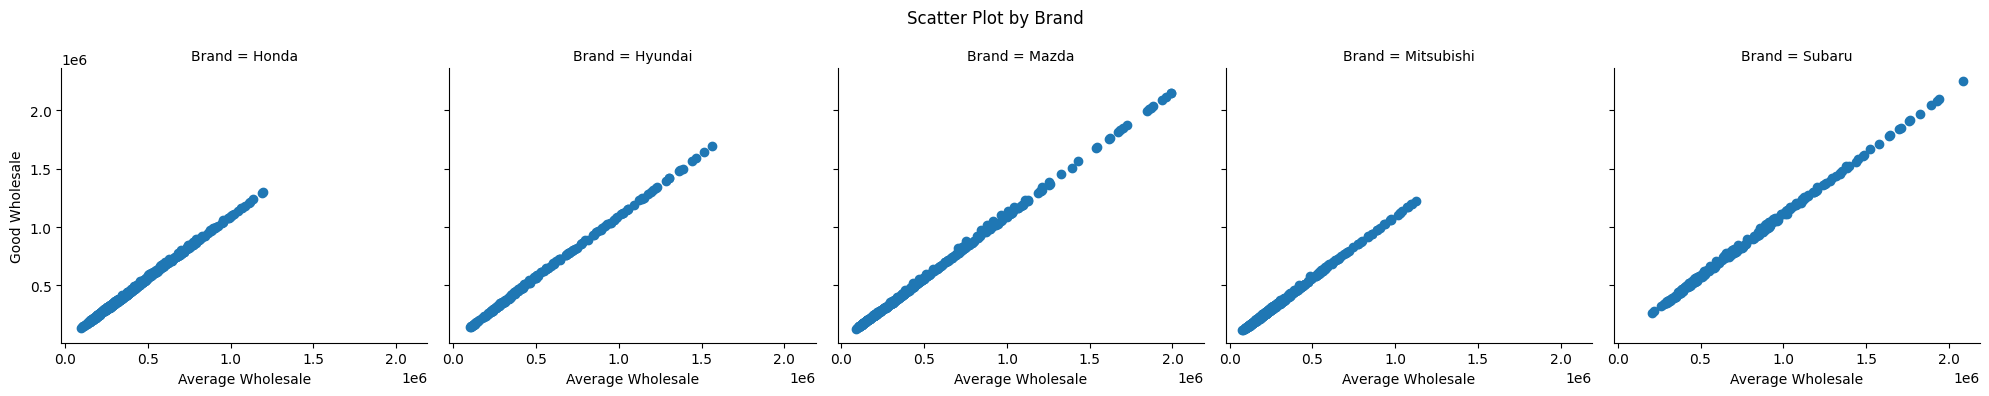

In [53]:
# Create a FacetGrid object
grid = sns.FacetGrid(data, col='Brand', height=4)
# Scatter plot by group facet
grid.map(plt.scatter, 'Average Wholesale', 'Good Wholesale')
grid.set_xlabels('Average Wholesale')
grid.set_ylabels('Good Wholesale')
plt.suptitle('Scatter Plot by Brand')
plt.tight_layout()
plt.show()


D:\Users\anyamanee\AppData\Local\Temp\ipykernel_22276\948558134.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


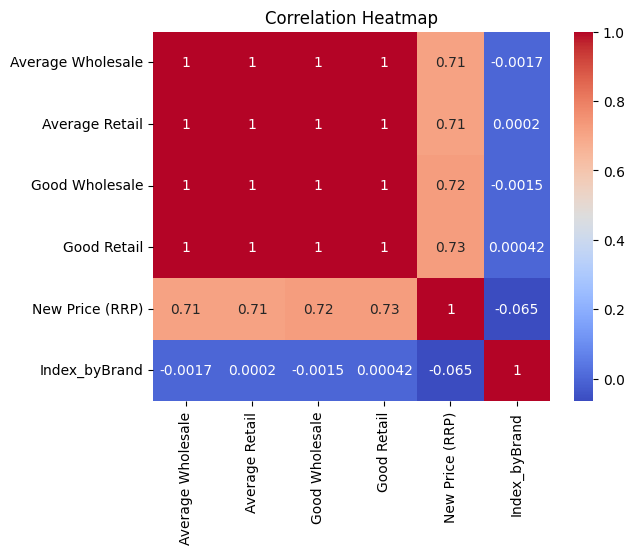

In [52]:
# Correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

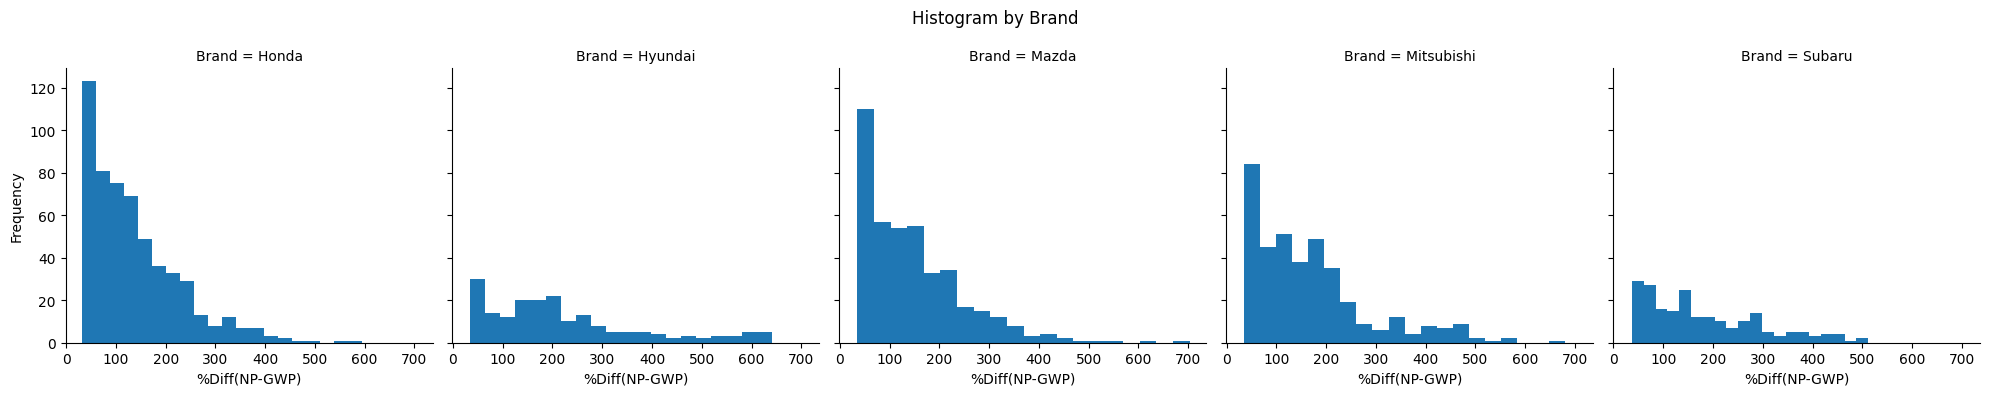

In [76]:
# Histogram by group facet
grid = sns.FacetGrid(data, col='Brand', height=4)
grid.map(plt.hist, '%Diff(NP-GWP)', bins=20)
grid.set_xlabels('%Diff(NP-GWP)')
grid.set_ylabels('Frequency')
plt.suptitle('Histogram by Brand')
plt.tight_layout()
plt.show()

d:\Users\anyamanee\AppData\Local\anaconda3\envs\aaaproject\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


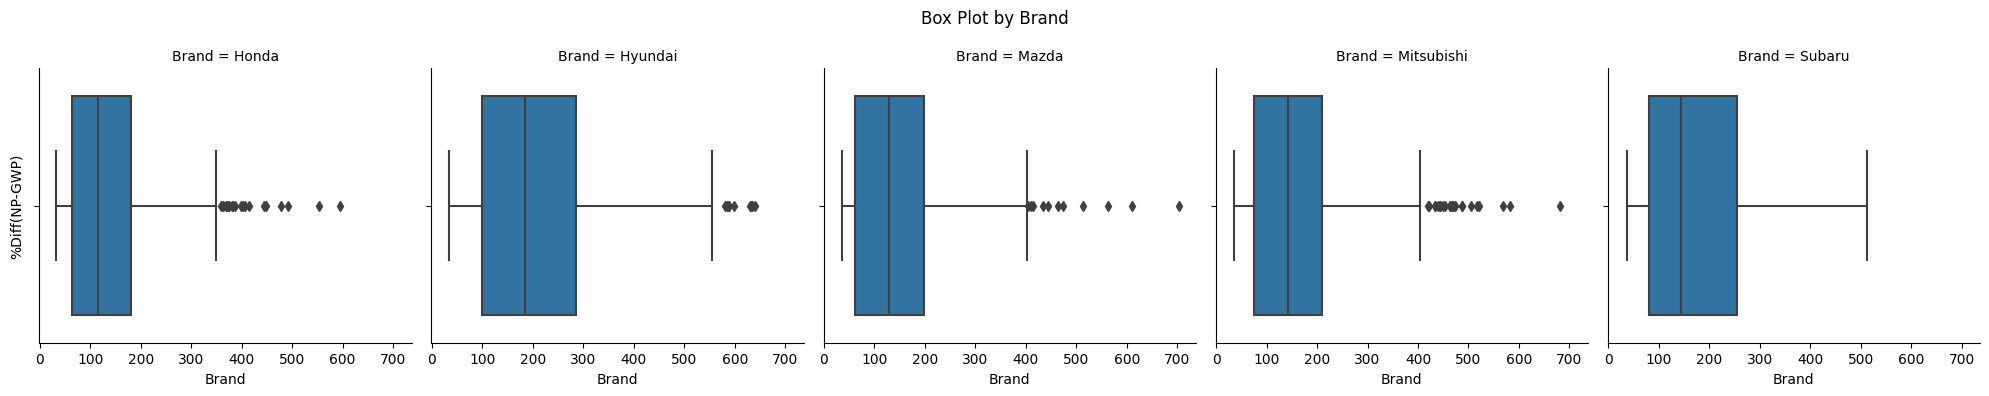

In [78]:
# Box plot by group facet
grid = sns.FacetGrid(data, col='Brand', height=4)
grid.map(sns.boxplot, '%Diff(NP-GWP)')
grid.set_xlabels('Brand')
grid.set_ylabels('%Diff(NP-GWP)')
plt.suptitle('Box Plot by Brand')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create data for the plots
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plot 1
fig1 = plt.figure()
plt.plot(x, y1)
plt.xlabel('X')
plt.ylabel('Y1')
plt.title('Plot 1')

# Plot 2
fig2 = plt.figure()
plt.plot(x, y2)
plt.xlabel('X')
plt.ylabel('Y2')
plt.title('Plot 2')

# Show the plots in separate windows
plt.show(fig1)
plt.show(fig2)


## Data from One2Car Website

In [35]:
import os

root = r"D:\Users\anyamanee\Anyamanee_Work\01_AppleAutoAuction\01_WebScraping\01_Python_DATA_One2Car\02_Data_NoClean"
list_path = [os.path.join(path, name) 
             for path, subdirs, files in os.walk(root) 
             for name in files if name.endswith(".csv")]
print(list_path[0:10])

['D:\\Users\\anyamanee\\Anyamanee_Work\\01_AppleAutoAuction\\01_WebScraping\\01_Python_DATA_One2Car\\02_Data_NoClean\\csv\\20230621_142709_P10_one2car_data_noclean.csv', 'D:\\Users\\anyamanee\\Anyamanee_Work\\01_AppleAutoAuction\\01_WebScraping\\01_Python_DATA_One2Car\\02_Data_NoClean\\csv\\20230621_142742_P20_one2car_data_noclean.csv', 'D:\\Users\\anyamanee\\Anyamanee_Work\\01_AppleAutoAuction\\01_WebScraping\\01_Python_DATA_One2Car\\02_Data_NoClean\\csv\\20230621_142815_P30_one2car_data_noclean.csv', 'D:\\Users\\anyamanee\\Anyamanee_Work\\01_AppleAutoAuction\\01_WebScraping\\01_Python_DATA_One2Car\\02_Data_NoClean\\csv\\20230621_142846_P40_one2car_data_noclean.csv', 'D:\\Users\\anyamanee\\Anyamanee_Work\\01_AppleAutoAuction\\01_WebScraping\\01_Python_DATA_One2Car\\02_Data_NoClean\\csv\\20230621_142921_P50_one2car_data_noclean.csv', 'D:\\Users\\anyamanee\\Anyamanee_Work\\01_AppleAutoAuction\\01_WebScraping\\01_Python_DATA_One2Car\\02_Data_NoClean\\csv\\20230621_142955_P60_one2car_data

In [37]:
df_csv = [pd.read_csv(x) for x in list_path]
df_one2car = pd.concat(df_csv)
df_one2car.head()

,Unnamed: 0,Unnamed: 1,@type,position,item.@type,item.additionalType,item.name,item.image,item.description,item.brand.@type,...,item.offers.price,item.offers.priceCurrency,item.offers.itemCondition,item.offers.availability,item.offers.seller.@type,item.offers.seller.homeLocation.@type,item.offers.seller.homeLocation.address.@type,item.offers.seller.homeLocation.address.addressLocality,item.offers.seller.homeLocation.address.addressRegion,item.offers.seller.homeLocation.address.url
0,Page1,0,ListItem,1,Product,Car,2021 Toyota Hilux Revo 2.4 SMARTCAB Prerunner ...,['https://img1.icarcdn.com/55721311/thumb-l_%E...,"""วิ่งมาเพียง 18,xxx km เท่านั้น สภาพตัวรถโดยรว...",Brand,...,529000,THB,https://schema.org/UsedCondition,https://schema.org/InStock,Person,Place,PostalAddress,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,https://www.one2car.com/dealer/bigauto
1,Page1,1,ListItem,2,Product,Car,2022 Toyota Hilux Revo 2.4 SMARTCAB Prerunner ...,['https://img4.icarcdn.com/91422711/thumb-l_%E...,"""วิ่งมาเพียง 22,372 km เท่านั้นตัวรถอายุไม่กี่...",Brand,...,529000,THB,https://schema.org/UsedCondition,https://schema.org/InStock,Person,Place,PostalAddress,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,https://www.one2car.com/dealer/bigauto
2,Page1,2,ListItem,3,Product,Car,2013 Honda CR-V 2.0 (ปี 12-16) S SUV,['https://img1.icarcdn.com/50065911/thumb-l_%E...,"""honda cr-v 2.0 s ปี 2013 2000ซีซี เบนซิน เกีย...",Brand,...,486900,THB,https://schema.org/UsedCondition,https://schema.org/InStock,Person,Place,PostalAddress,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,https://www.one2car.com/dealer/50db5e4d-be31-4...
3,Page1,3,ListItem,4,Product,Car,2022 Toyota Hilux Revo 2.4 SMARTCAB Prerunner ...,['https://img4.icarcdn.com/18684121/thumb-l_%E...,"""วิ่งมาเพียง 9,xxx km เท่านั้น สภาพโดยรวมไม่ต่...",Brand,...,559000,THB,https://schema.org/UsedCondition,https://schema.org/InStock,Person,Place,PostalAddress,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,https://www.one2car.com/dealer/bigauto
4,Page1,4,ListItem,5,Product,Car,2020 Toyota Hilux Revo 2.4 SMARTCAB Prerunner ...,['https://img3.icarcdn.com/26113411/thumb-l_%E...,"""hot deal !!!! พบกับดีลที่ดีที่สุดได้แล้ววันนี...",Brand,...,539000,THB,https://schema.org/UsedCondition,https://schema.org/InStock,Person,Place,PostalAddress,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,https://www.one2car.com/dealer/bigauto


In [39]:
df_one2car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46124 entries, 0 to 103
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unnamed: 0                                               46124 non-null  object
 1   Unnamed: 1                                               46124 non-null  int64 
 2   @type                                                    46124 non-null  object
 3   position                                                 46124 non-null  int64 
 4   item.@type                                               46124 non-null  object
 5   item.additionalType                                      46124 non-null  object
 6   item.name                                                46124 non-null  object
 7   item.image                                               46124 non-null  object
 8   item.description                      

In [77]:
df_one2car.columns.values.tolist()


['Unnamed: 0',
 'Unnamed: 1',
 '@type',
 'position',
 'item.@type',
 'item.additionalType',
 'item.name',
 'item.image',
 'item.description',
 'item.brand.@type',
 'item.brand.name',
 'item.author.@type',
 'item.author.name',
 'item.model',
 'item.bodyType',
 'item.fuelType',
 'item.seatingCapacity',
 'item.color',
 'item.mainEntityOfPage',
 'item.url',
 'item.offers.@type',
 'item.offers.price',
 'item.offers.priceCurrency',
 'item.offers.itemCondition',
 'item.offers.availability',
 'item.offers.seller.@type',
 'item.offers.seller.homeLocation.@type',
 'item.offers.seller.homeLocation.address.@type',
 'item.offers.seller.homeLocation.address.addressLocality',
 'item.offers.seller.homeLocation.address.addressRegion',
 'item.offers.seller.homeLocation.address.url']

In [87]:
col_drop = ['Unnamed: 1',
            '@type',
            'item.@type',
            'item.additionalType',
            'item.brand.@type',
            'item.offers.itemCondition',
            'item.offers.availability',
            'item.offers.seller.@type',
            'item.offers.seller.homeLocation.@type',
            'item.offers.seller.homeLocation.address.@type',
            'item.offers.seller.homeLocation.address.url']

In [88]:
df_one2car_drop = df_one2car.drop(columns= col_drop)

In [89]:
df_one2car_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46124 entries, 0 to 103
Data columns (total 22 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unnamed: 0                                               46124 non-null  object
 1   position                                                 46124 non-null  int64 
 2   item.additionalType                                      46124 non-null  object
 3   item.name                                                46124 non-null  object
 4   item.image                                               46124 non-null  object
 5   item.description                                         46124 non-null  object
 6   item.brand.@type                                         46124 non-null  object
 7   item.brand.name                                          46124 non-null  object
 8   item.author.@type                     

In [86]:
df_one2car[0]

KeyError: 0

In [ ]:
headers_updated = ['PageNo',
 'Unnamed: 1',
 '@type',
 'position',
 'item.@type',
 'item.additionalType',
 'item.name',
 'item.image',
 'item.description',
 'item.brand.@type',
 'item.brand.name',
 'item.author.@type',
 'item.author.name',
 'item.model',
 'item.bodyType',
 'item.fuelType',
 'item.seatingCapacity',
 'item.color',
 'item.mainEntityOfPage',
 'item.url',
 'item.offers.@type',
 'item.offers.price',
 'item.offers.priceCurrency',
 'item.offers.itemCondition',
 'item.offers.availability',
 'item.offers.seller.@type',
 'item.offers.seller.homeLocation.@type',
 'item.offers.seller.homeLocation.address.@type',
 'item.offers.seller.homeLocation.address.addressLocality',
 'item.offers.seller.homeLocation.address.addressRegion',
 'item.offers.seller.homeLocation.address.url']